In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
plant=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
pd.set_option('display.max_column', None)

In [5]:
plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
plant.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
plant.shape

(907, 27)

In [8]:
### Data Analysis

In [9]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [10]:

plant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [11]:

plant= plant.drop(columns=['country', 'country_long', 'other_fuel1', 'other_fuel2', 'other_fuel3'])

In [12]:
plant=plant.drop(columns=['source', 'url', 'wepp_id', 'geolocation_source'])

In [13]:
plant=plant.drop(columns=['year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh'])

In [14]:
plant.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [15]:
plant['latitude']= plant['latitude'].fillna(plant['latitude'].mean())
plant['longitude']= plant['longitude'].fillna(plant['longitude'].mean())
plant['commissioning_year']= plant['commissioning_year'].fillna(plant['commissioning_year'].mode()[0])

In [16]:
plant['generation_gwh_2014']= plant['generation_gwh_2014'].fillna(plant['generation_gwh_2014'].mean())
plant['generation_gwh_2015']= plant['generation_gwh_2015'].fillna(plant['generation_gwh_2015'].mean())
plant['generation_gwh_2016']= plant['generation_gwh_2016'].fillna(plant['generation_gwh_2016'].mean())
plant['generation_gwh_2017']= plant['generation_gwh_2017'].fillna(plant['generation_gwh_2017'].mean())
plant['generation_gwh_2018']= plant['generation_gwh_2018'].fillna(plant['generation_gwh_2018'].mean())

In [17]:
plant.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [18]:
plant['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

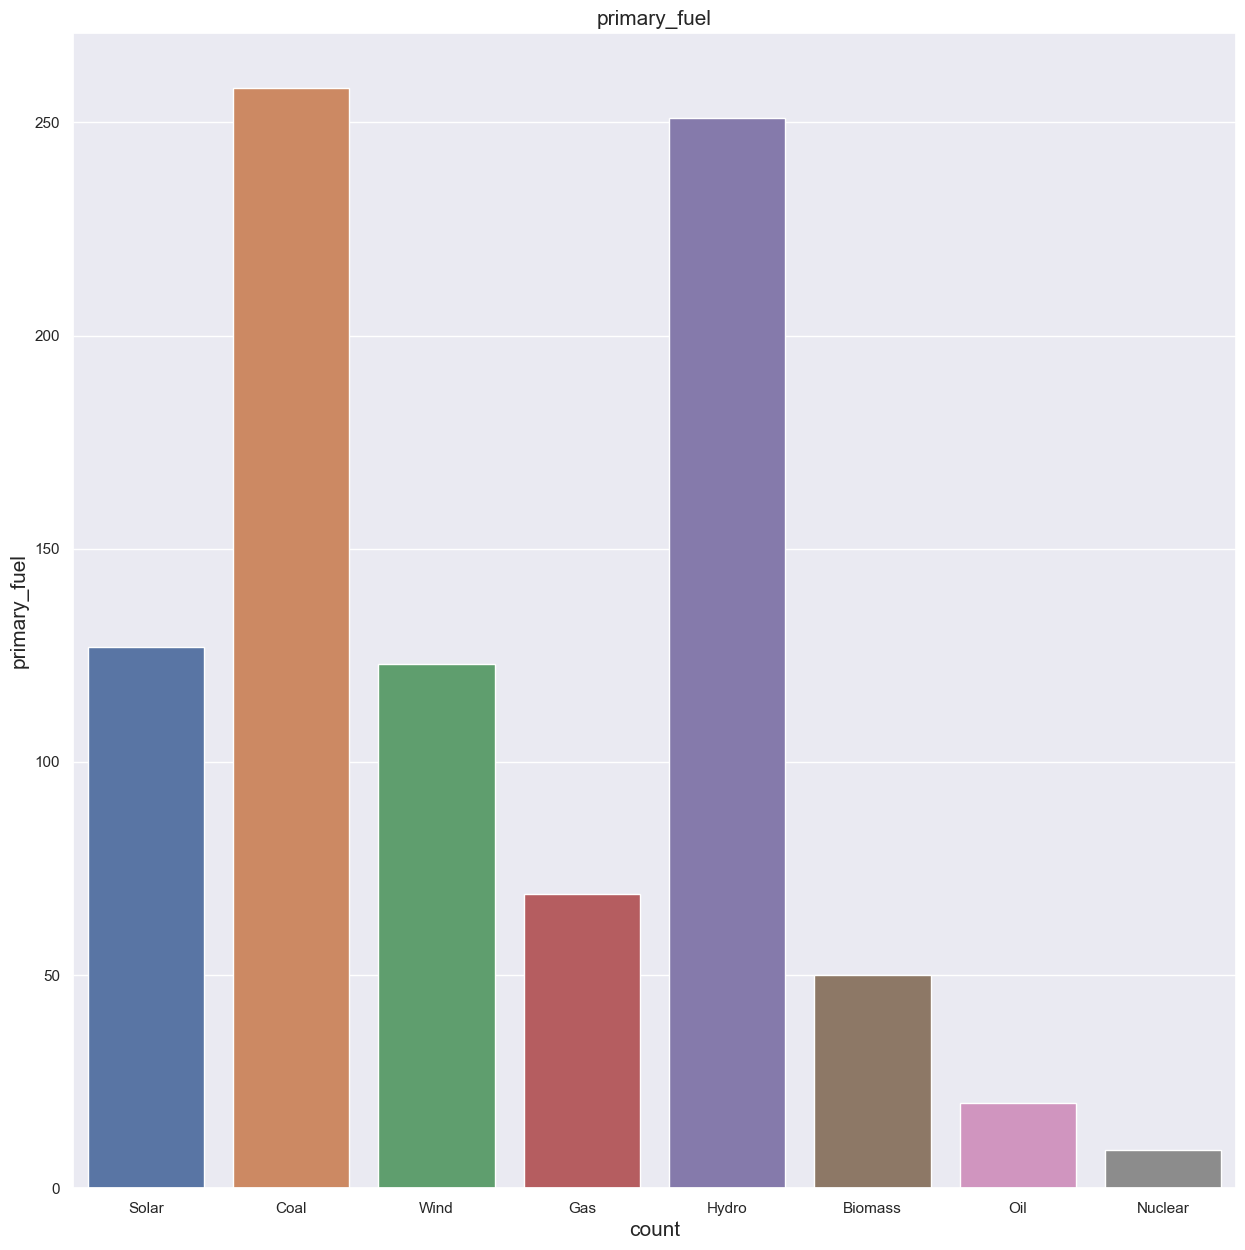

In [19]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,15))
sns.countplot(plant['primary_fuel'])
plt.xlabel('count',fontsize= 15)
plt.ylabel('primary_fuel', fontsize= 15)
plt.title('primary_fuel', fontsize=15)
plt.show()

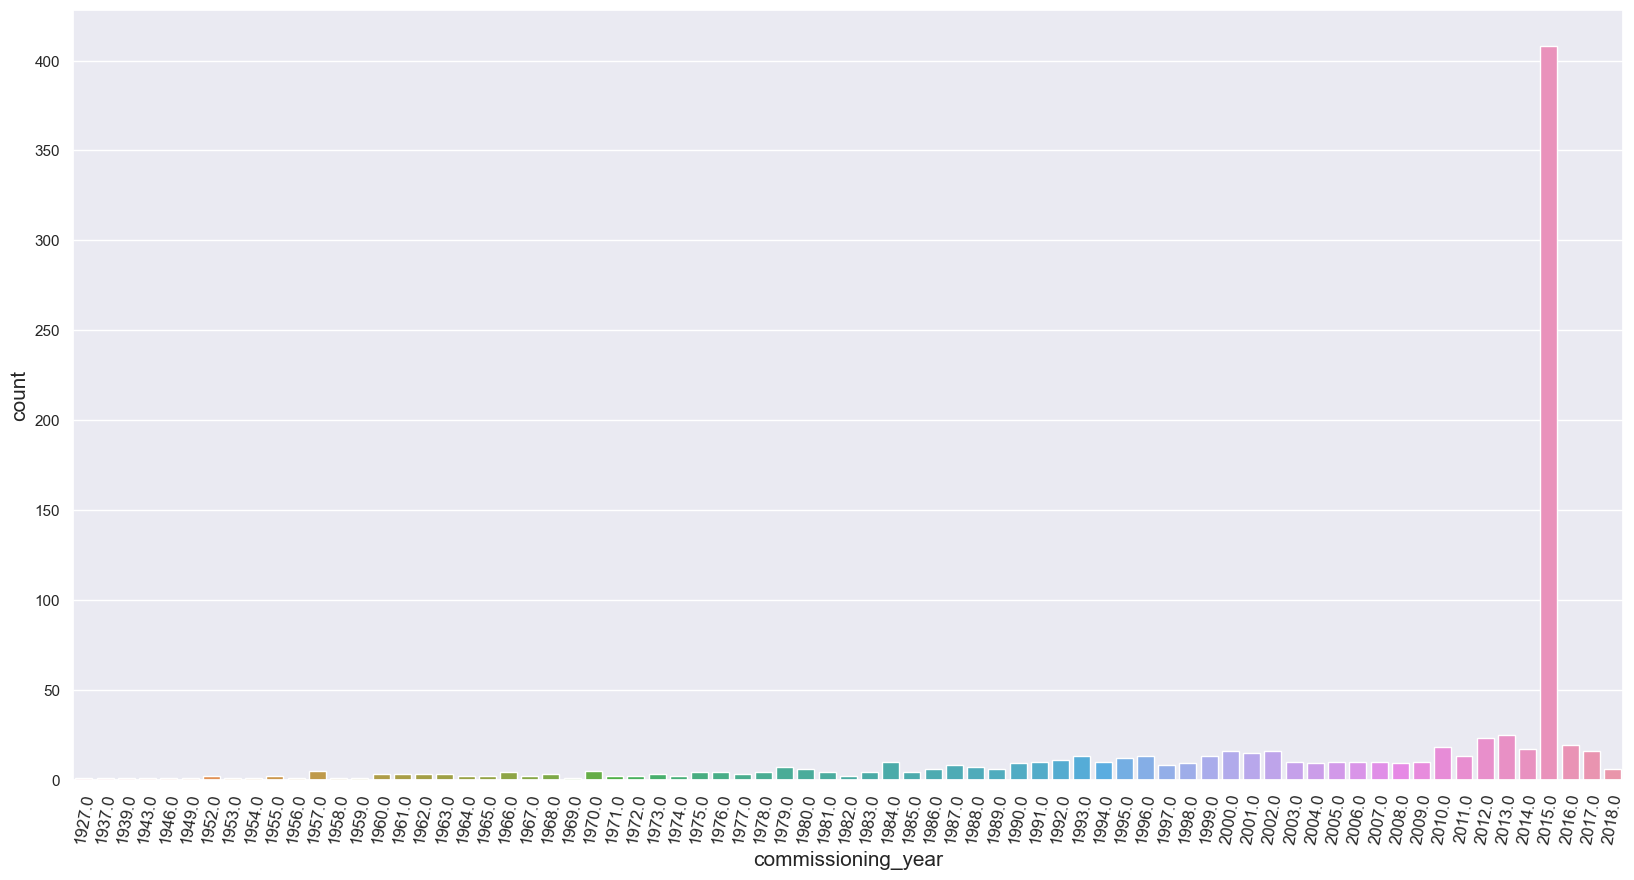

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(plant['commissioning_year'])
plt.xlabel('commissioning_year', fontsize=15)
plt.ylabel('count', fontsize=15)
labels=plt.xticks(fontsize=12 , rotation=80)

plt.show()

In [21]:
plant['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

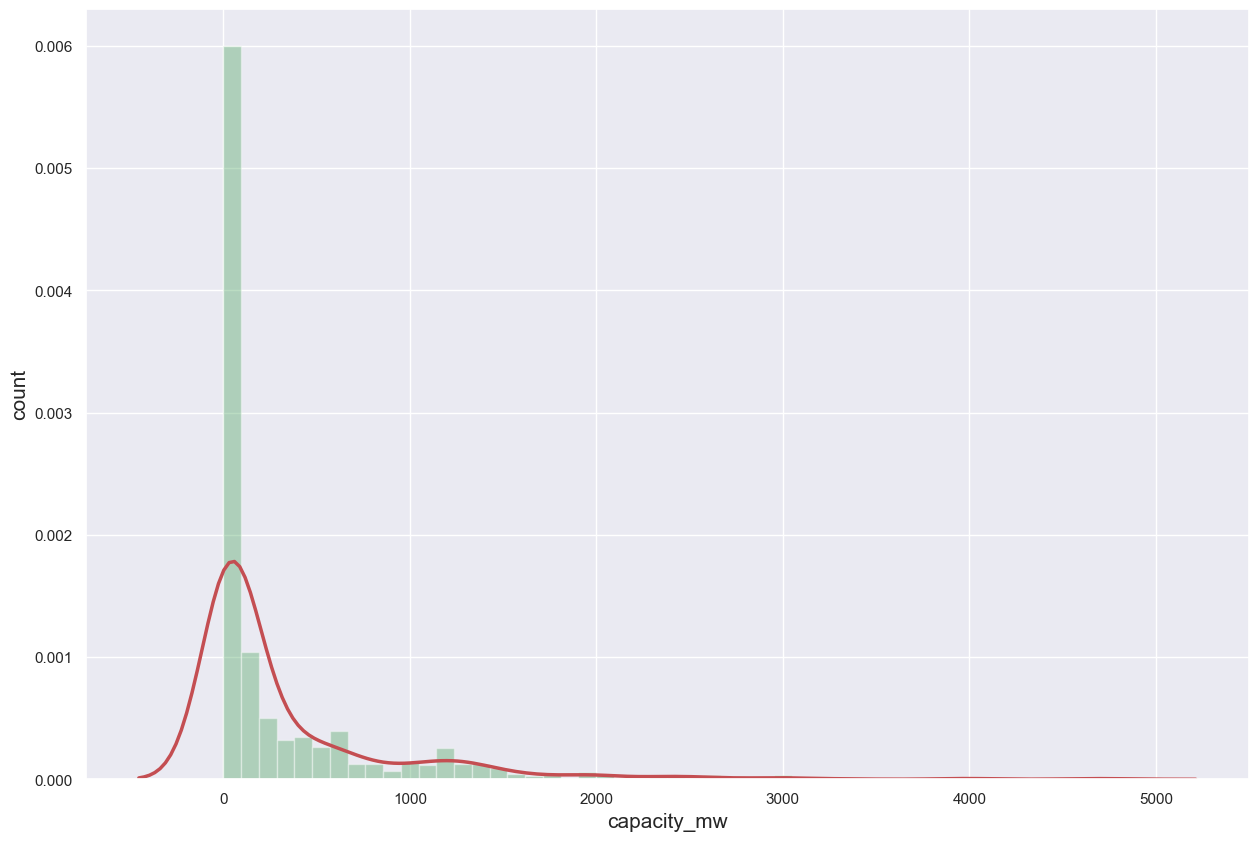

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(plant['capacity_mw'], kde_kws={'color':'r', 'lw':2.5, 'label':'KDE'}, color='g')
plt.xlabel('capacity_mw', fontsize= 15)
plt.ylabel('count', fontsize=15)
plt.show()

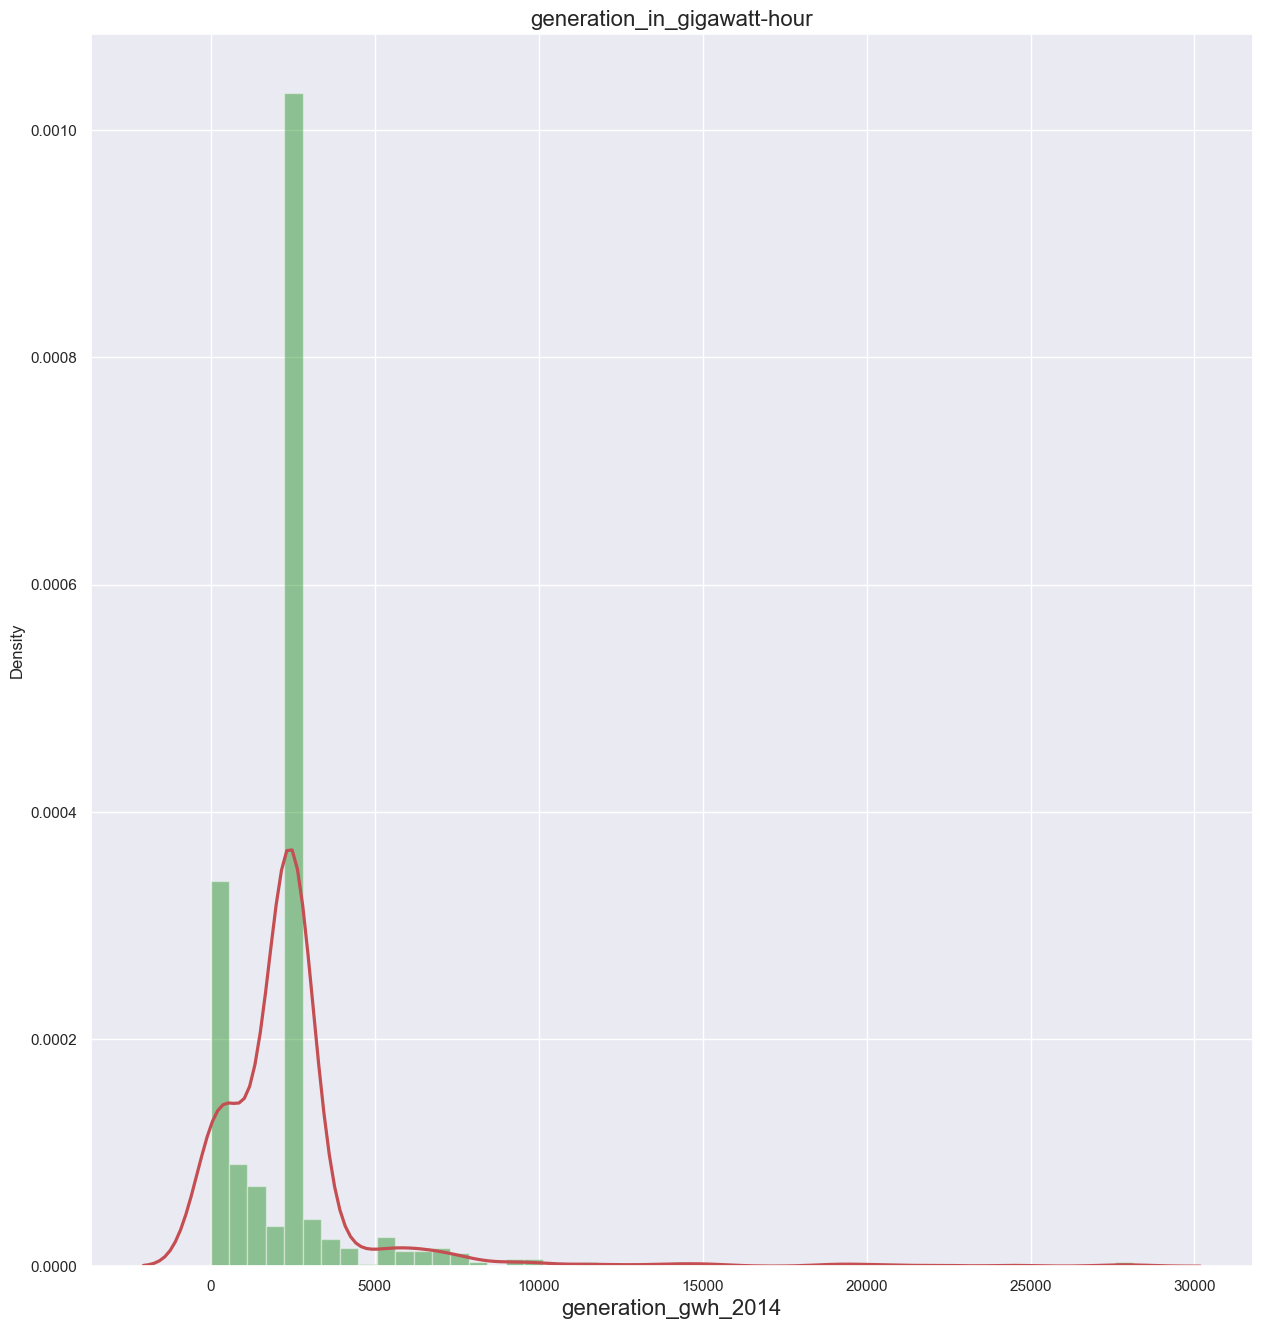

In [23]:
plt.figure(figsize=(15,16))
sns.distplot(plant['generation_gwh_2014'], kde_kws={'color':'r', 'lw':2.3, 'label':'KDE'}, color='green')
plt.xlabel('generation_gwh_2014', fontsize=16)
plt.title('generation_in_gigawatt-hour', fontsize=16)
plt.show()

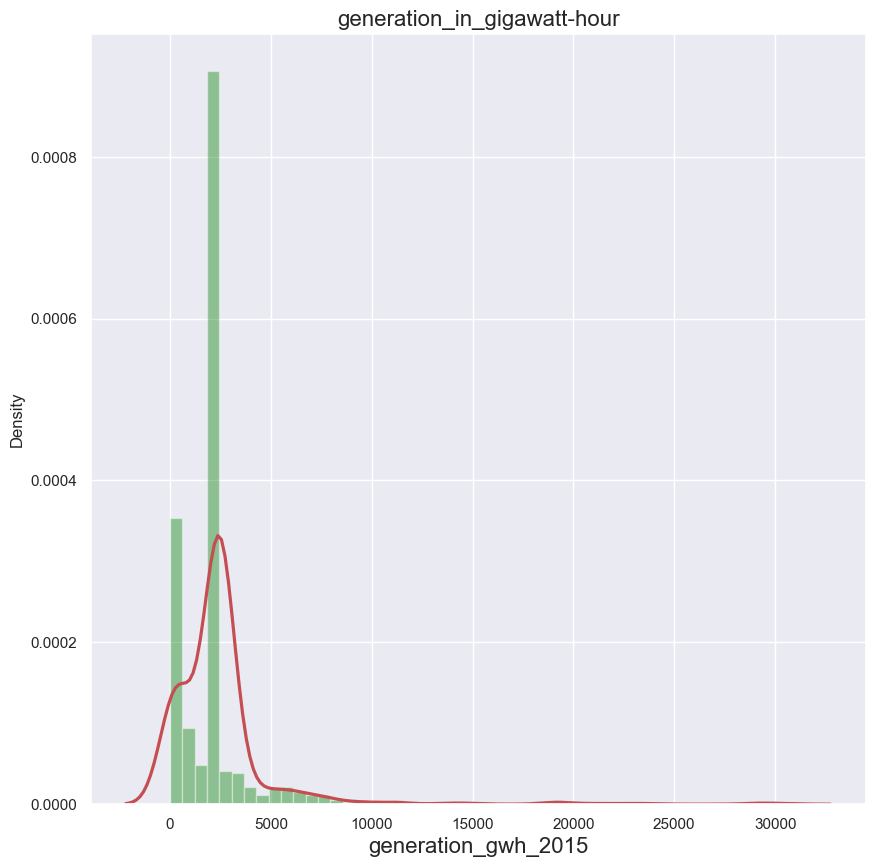

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(plant['generation_gwh_2015'], kde_kws={'color':'r', 'lw':2.3, 'label':'KDE'}, color='green')
plt.xlabel('generation_gwh_2015', fontsize=16)
plt.title('generation_in_gigawatt-hour', fontsize=16)
plt.show()

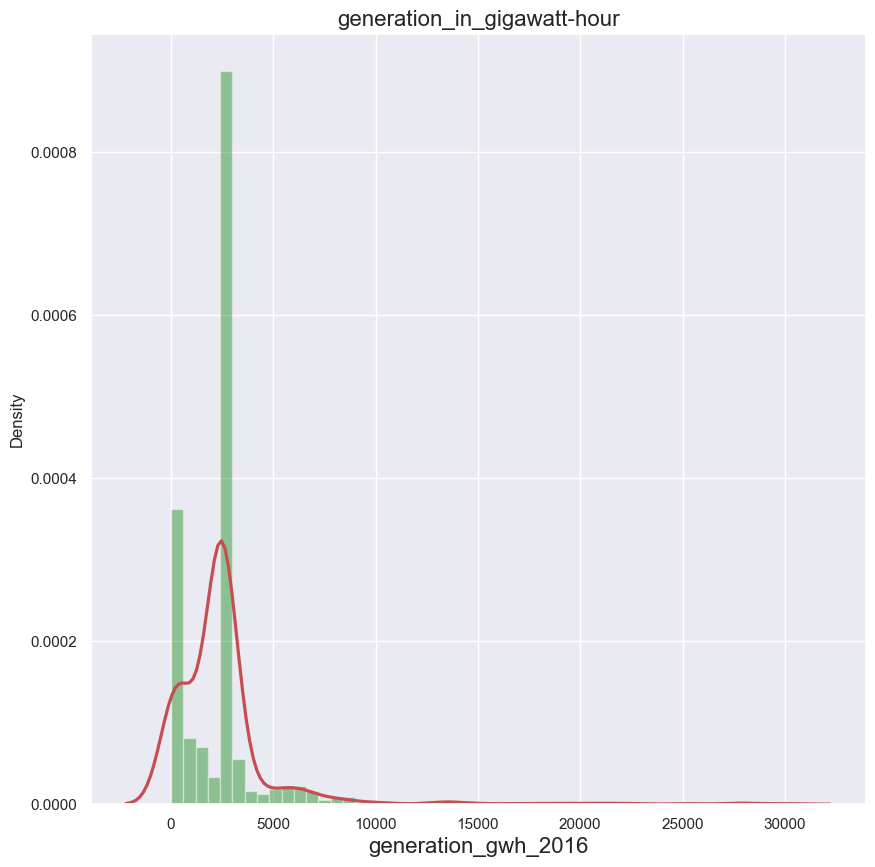

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(plant['generation_gwh_2016'], kde_kws={'color':'r', 'lw':2.3, 'label':'KDE'}, color='green')
plt.xlabel('generation_gwh_2016', fontsize=16)
plt.title('generation_in_gigawatt-hour', fontsize=16)
plt.show()

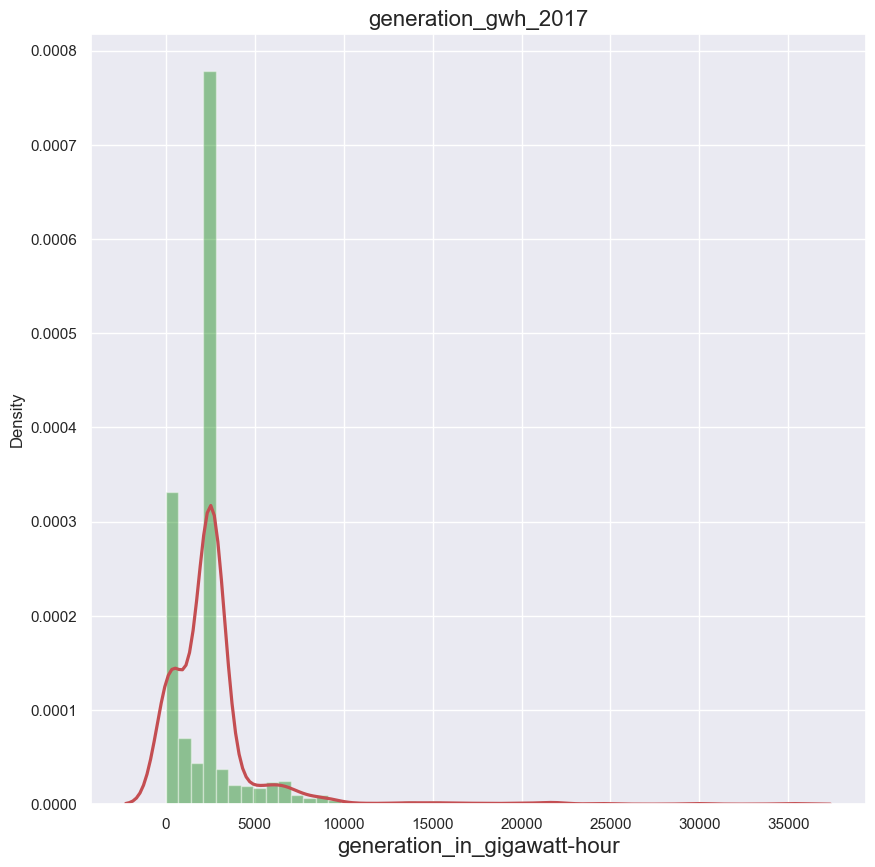

In [26]:
plt.figure(figsize=(10,10))
sns.distplot(plant['generation_gwh_2017'], kde_kws={'color':'r', 'lw':2.3, 'label':'KDE'}, color='green')
plt.xlabel('generation_in_gigawatt-hour', fontsize=16)
plt.title('generation_gwh_2017', fontsize=16)
plt.show()

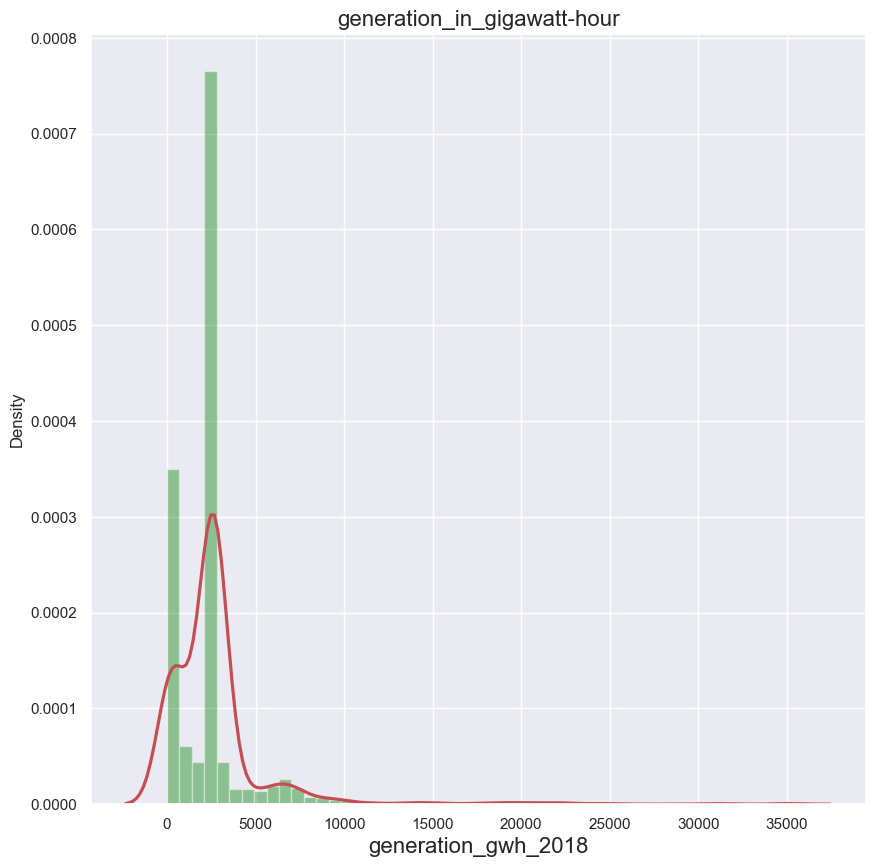

In [27]:
plt.figure(figsize=(10,10))
sns.distplot(plant['generation_gwh_2018'], kde_kws={'color':'r', 'lw':2.3, 'label':'KDE'}, color='green')
plt.xlabel('generation_gwh_2018', fontsize=16)
plt.title('generation_in_gigawatt-hour', fontsize=16)
plt.show()

In [28]:
## Analysis Feature Vs Label columns.

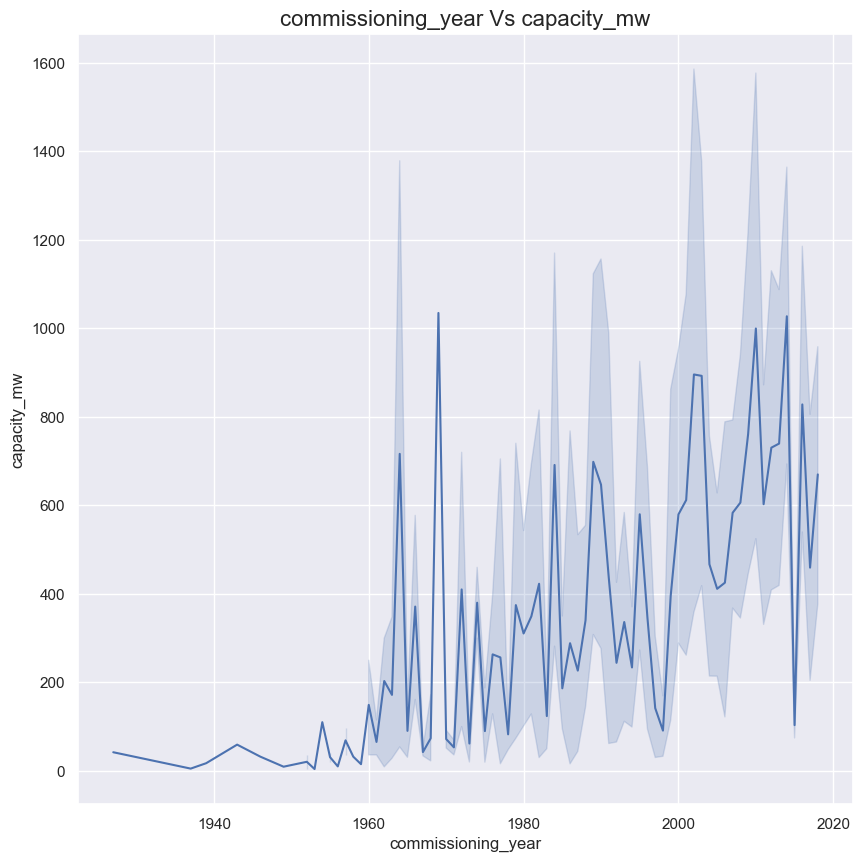

In [29]:
plt.figure(figsize=(10,10))
sns.lineplot( x='commissioning_year', y= 'capacity_mw', data=plant)
plt.title('commissioning_year Vs capacity_mw', fontsize=16)
plt.show()

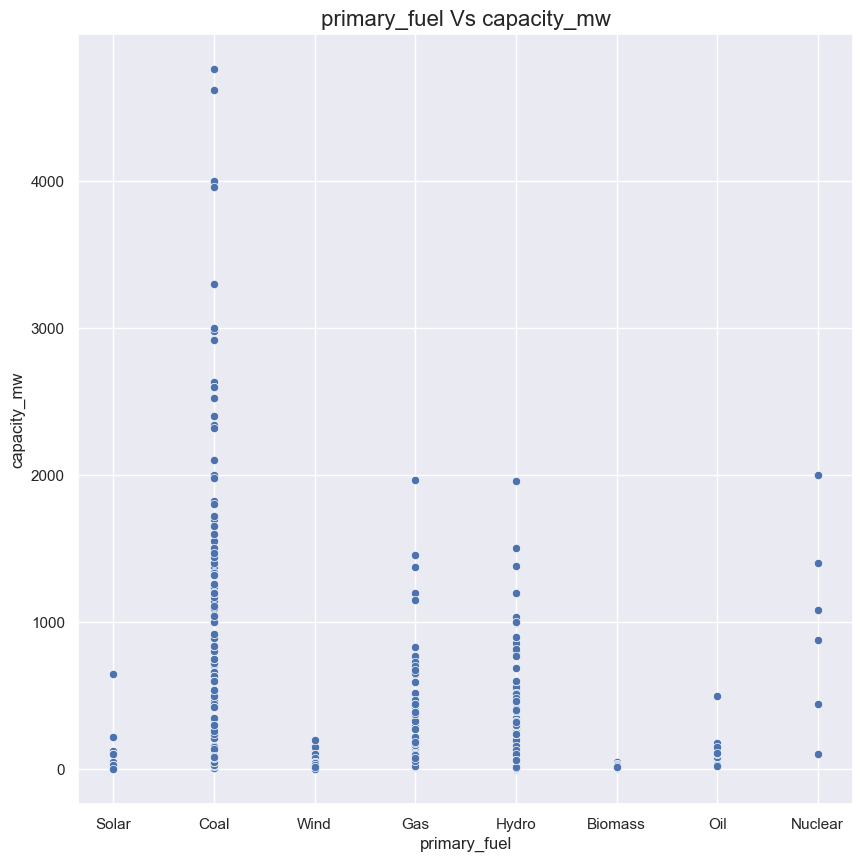

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot( x='primary_fuel', y= 'capacity_mw', data=plant)
plt.title('primary_fuel Vs capacity_mw', fontsize=16)
plt.show()

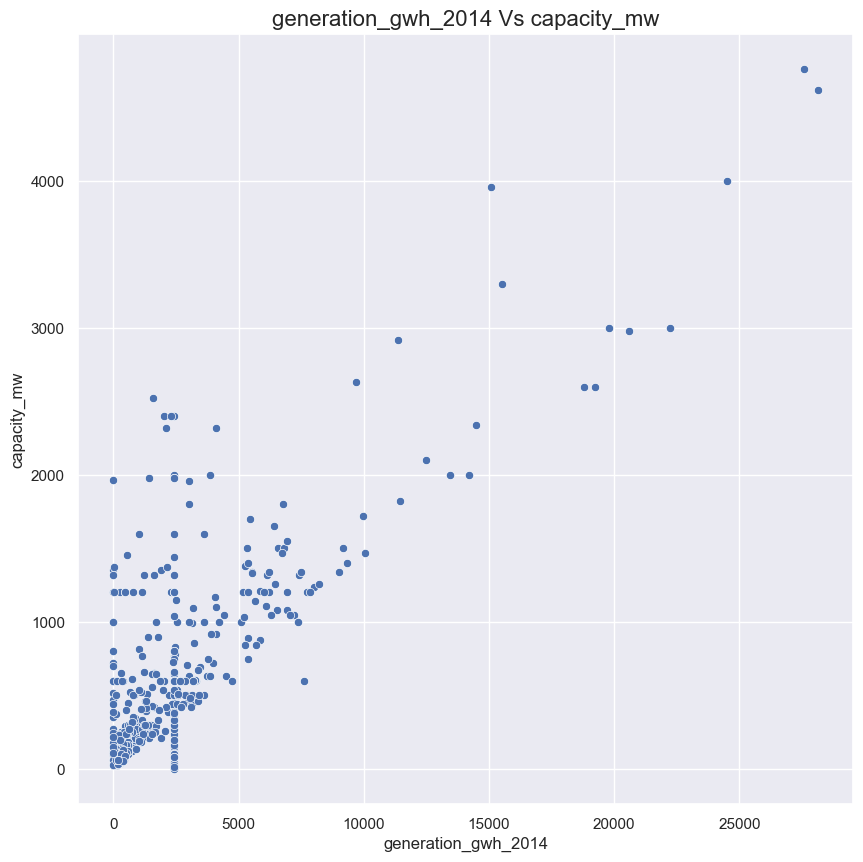

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot( x='generation_gwh_2014', y= 'capacity_mw', data=plant)
plt.title('generation_gwh_2014 Vs capacity_mw', fontsize=16)
plt.show()

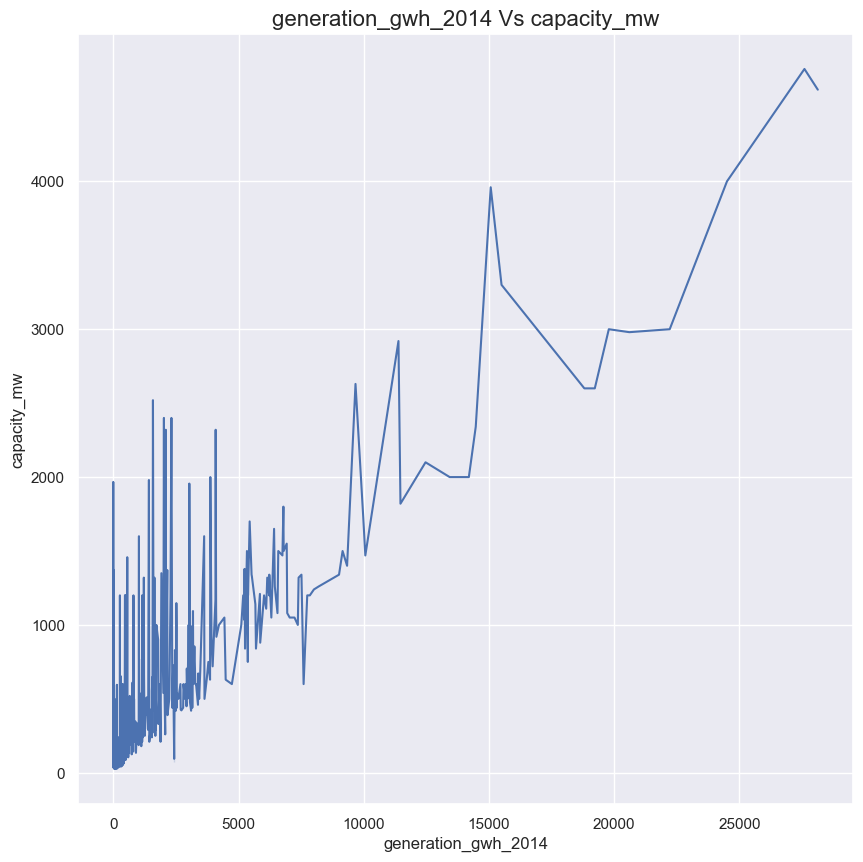

In [32]:
plt.figure(figsize=(10,10))
sns.lineplot( x='generation_gwh_2014', y= 'capacity_mw', data=plant)
plt.title('generation_gwh_2014 Vs capacity_mw', fontsize=16)
plt.show()

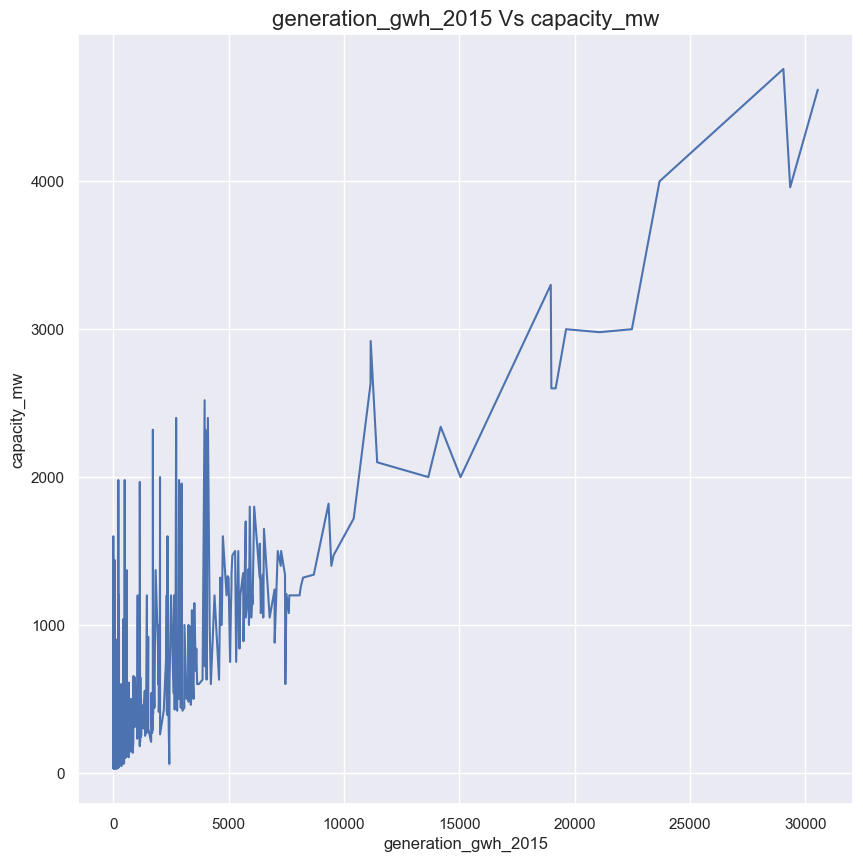

In [33]:
plt.figure(figsize=(10,10))
sns.lineplot( x='generation_gwh_2015', y= 'capacity_mw', data=plant)
plt.title('generation_gwh_2015 Vs capacity_mw', fontsize=16)
plt.show()

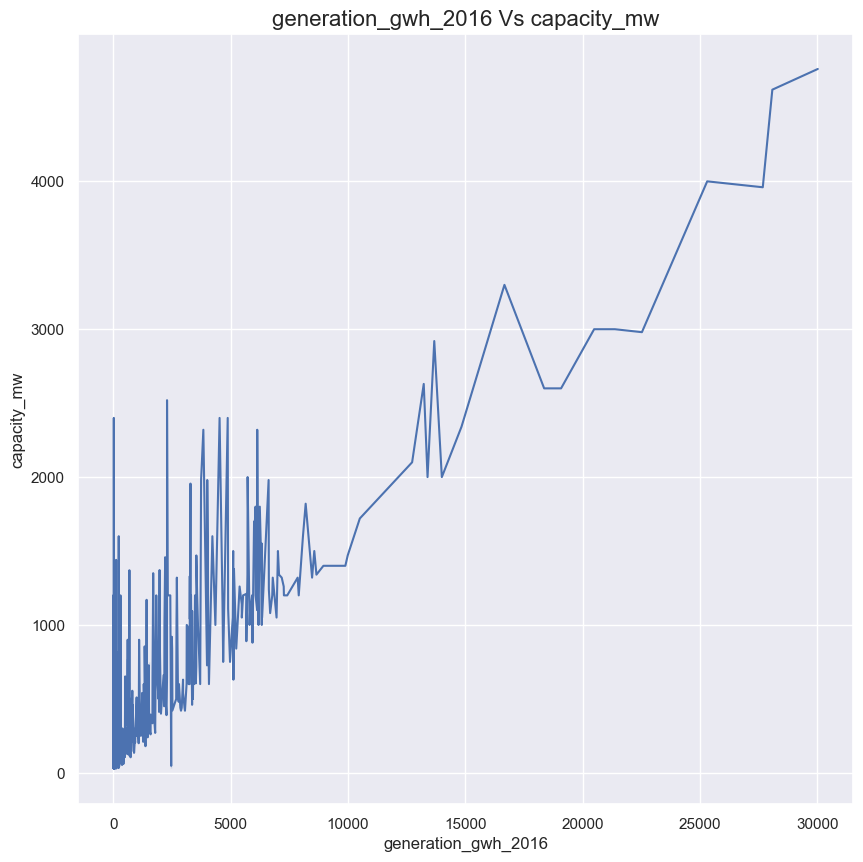

In [34]:
plt.figure(figsize=(10,10))
sns.lineplot( x='generation_gwh_2016', y= 'capacity_mw', data=plant)
plt.title('generation_gwh_2016 Vs capacity_mw', fontsize=16)
plt.show()

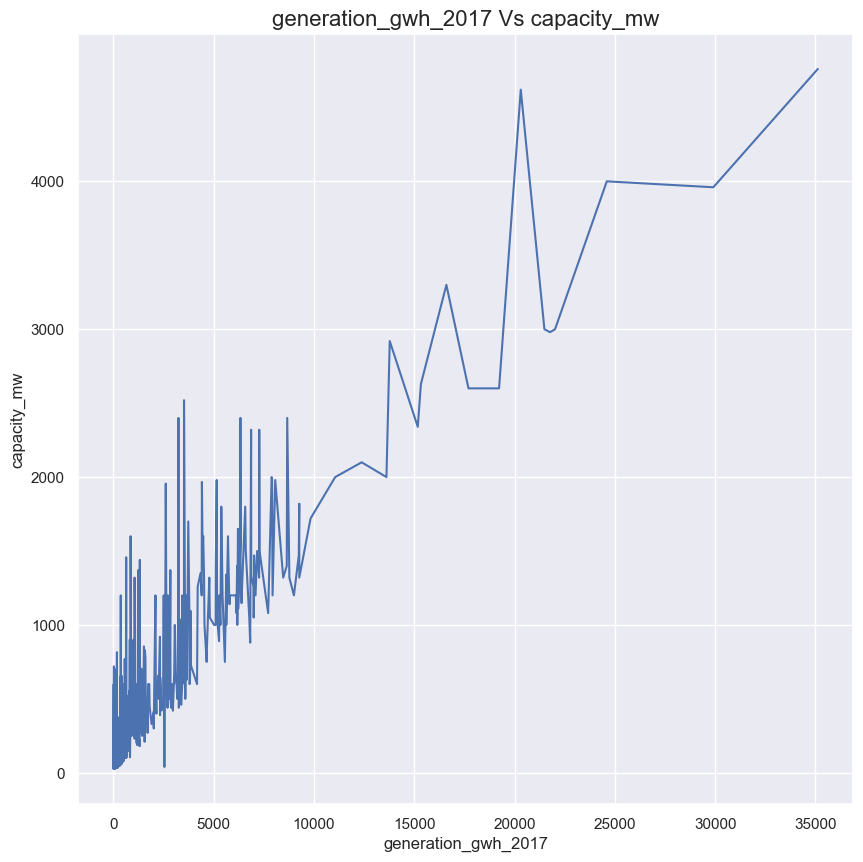

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot( x='generation_gwh_2017', y= 'capacity_mw', data=plant)
plt.title('generation_gwh_2017 Vs capacity_mw', fontsize=16)
plt.show()

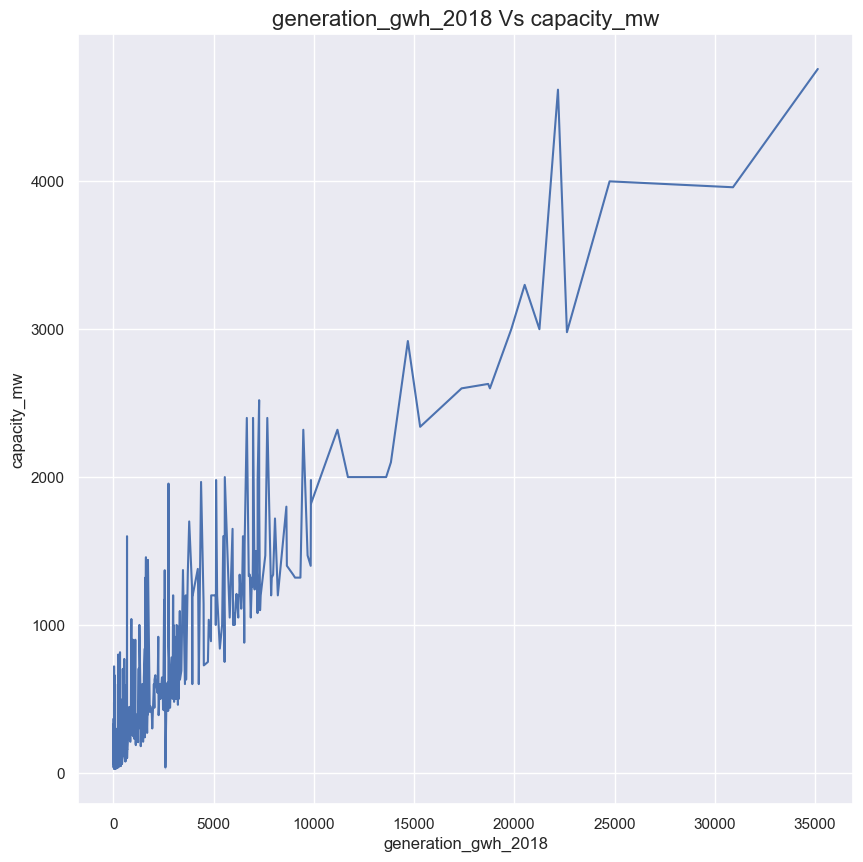

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot( x='generation_gwh_2018', y= 'capacity_mw', data=plant)
plt.title('generation_gwh_2018 Vs capacity_mw', fontsize=16)
plt.show()

In [37]:
## comparision(Analysis) again between Feature and other label(Primary_fuel).



<Figure size 1000x1000 with 0 Axes>

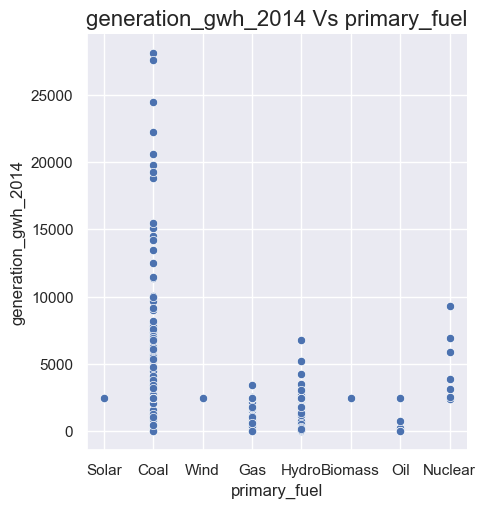

In [38]:
plt.figure(figsize=(10,10))
sns.relplot( x='primary_fuel', y= 'generation_gwh_2014', data=plant)
plt.title('generation_gwh_2014 Vs primary_fuel', fontsize=16)
plt.show()

<Figure size 1000x1000 with 0 Axes>

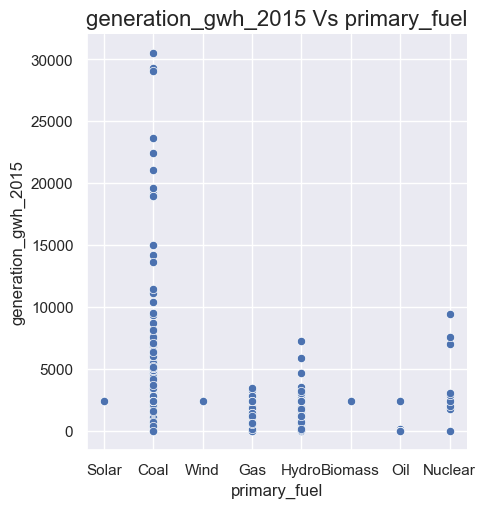

In [39]:
plt.figure(figsize=(10,10))
sns.relplot( x='primary_fuel', y= 'generation_gwh_2015', data=plant)
plt.title('generation_gwh_2015 Vs primary_fuel', fontsize=16)
plt.show()

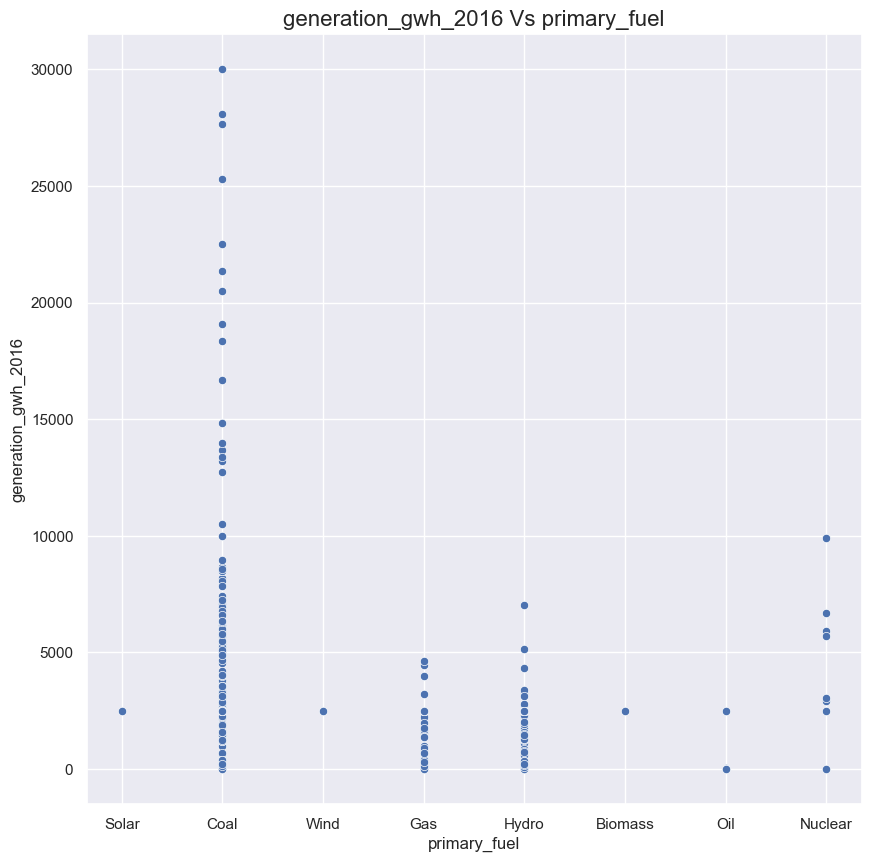

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot( x='primary_fuel', y= 'generation_gwh_2016', data=plant)
plt.title('generation_gwh_2016 Vs primary_fuel', fontsize=16)
plt.show()

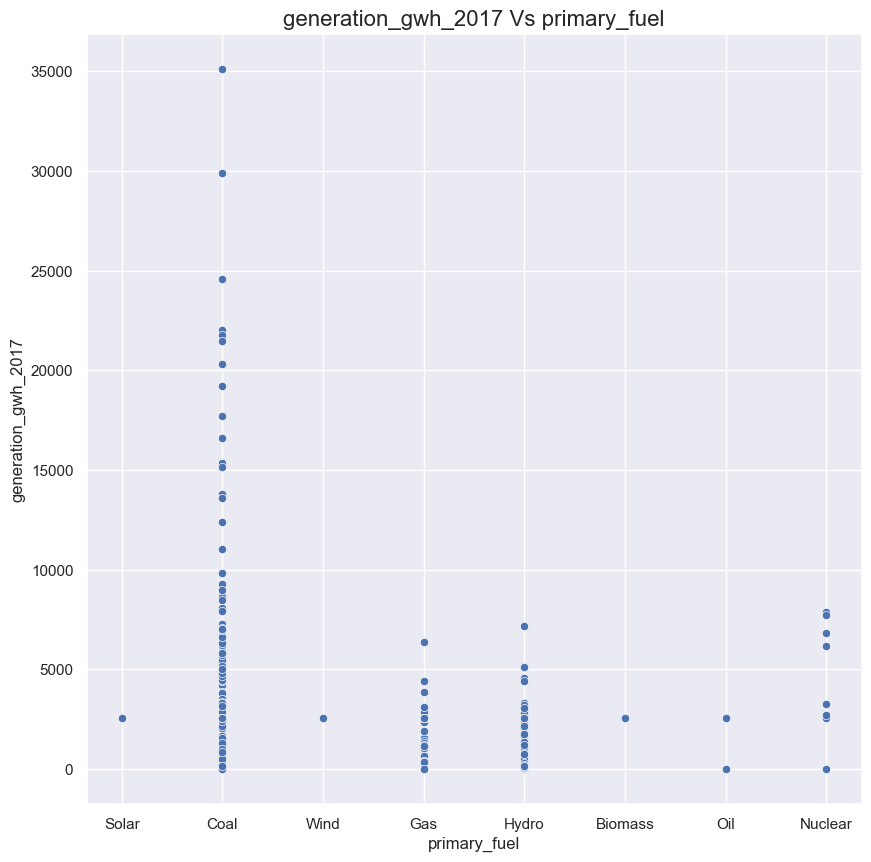

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot( x='primary_fuel', y= 'generation_gwh_2017', data=plant)
plt.title('generation_gwh_2017 Vs primary_fuel', fontsize=16)
plt.show()

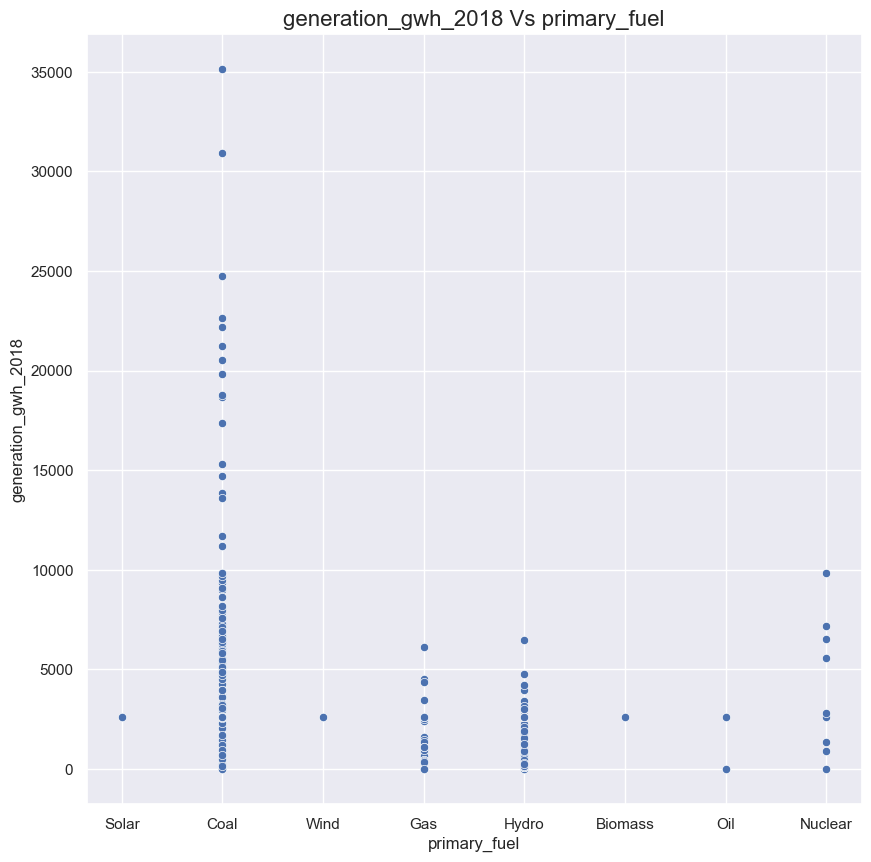

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot( x='primary_fuel', y= 'generation_gwh_2018', data=plant)
plt.title('generation_gwh_2018 Vs primary_fuel', fontsize=16)
plt.show()

In [43]:
##  Now we are seeing above all the analysis  in primary fuel and power generation , Coal is use as a Primary fuel in  our data set.


In [44]:
plant.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2015.0,AES,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


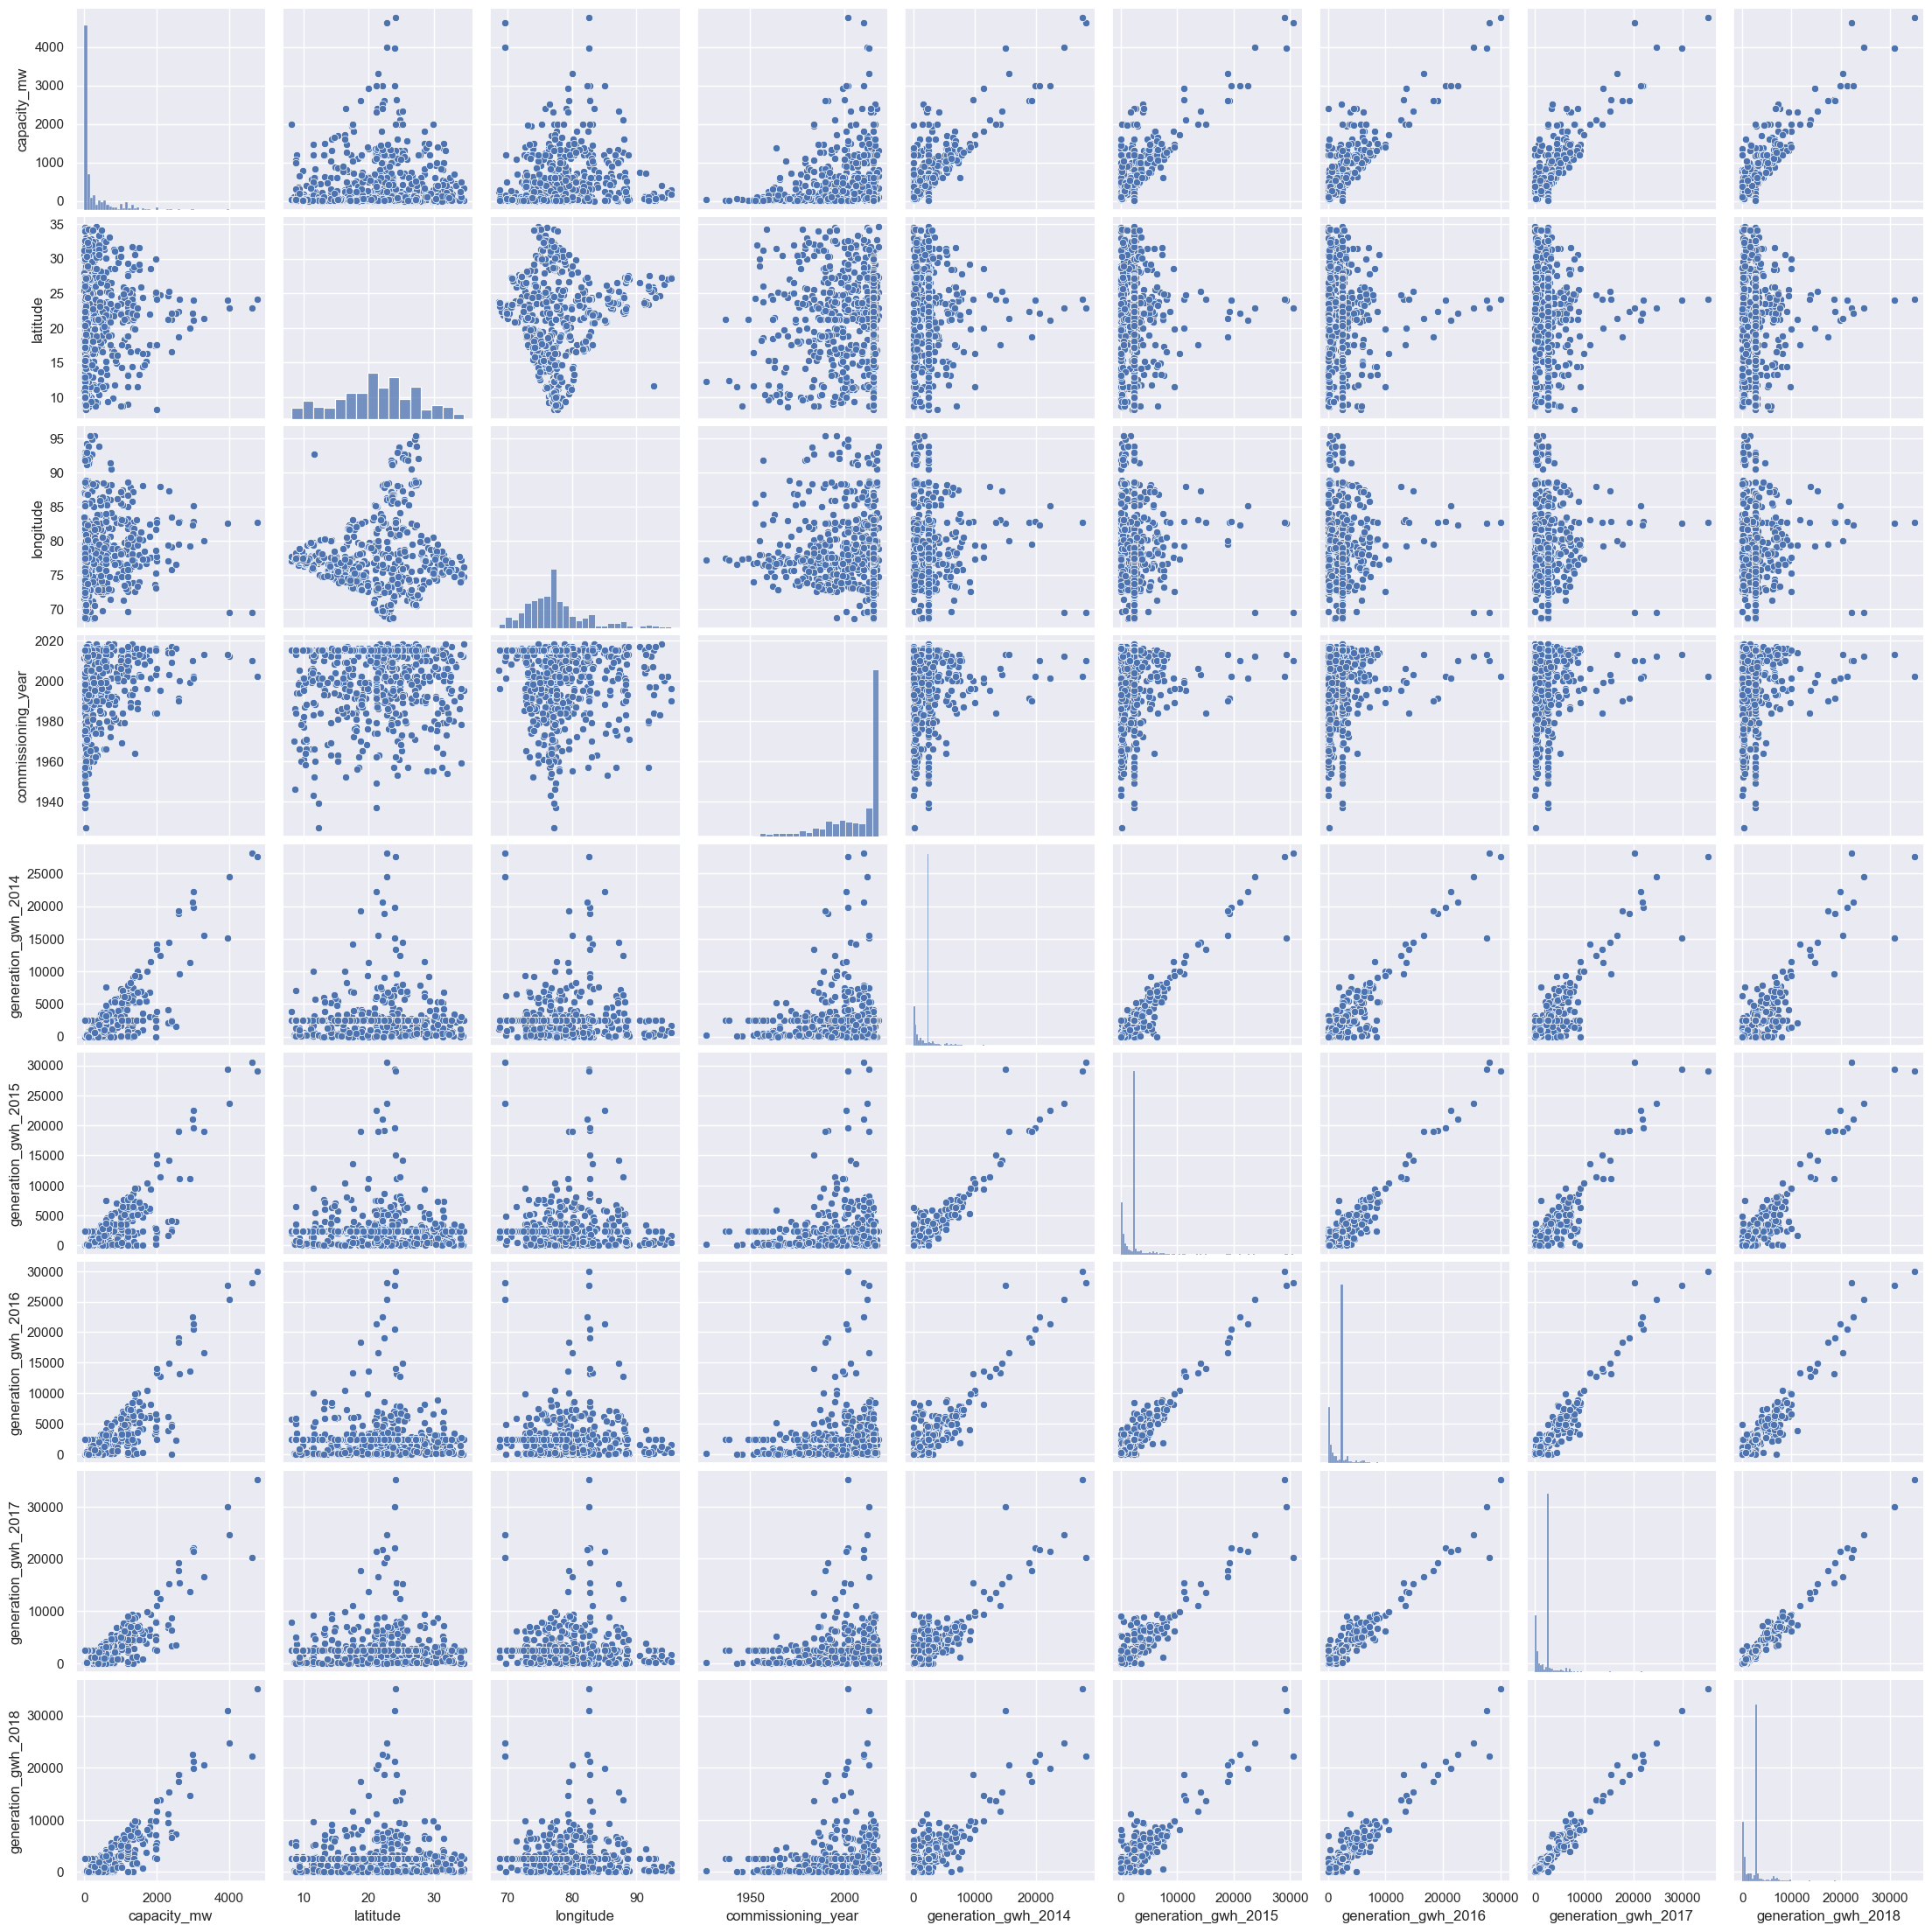

In [45]:
sns.pairplot(plant)

In [46]:
## Daot processing.
## Here we can see that   name , owner, commissioning year  ,gppd not so important  for our  model.

In [47]:
 plant= plant.drop(columns=['owner', 'commissioning_year', 'name', 'gppd_idnr'])

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
plant['primary_fuel']= le.fit_transform(plant['primary_fuel'])

In [49]:
plant.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,-0.010204,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,-0.347948,0.011472,0.018818,0.039209,0.039675,0.037780
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.124769,-0.124828,-0.131051,-0.132003,-0.136983
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,-0.132003,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,-0.136983,0.884956,0.923461,0.957159,0.982689,1.000000


<AxesSubplot:>

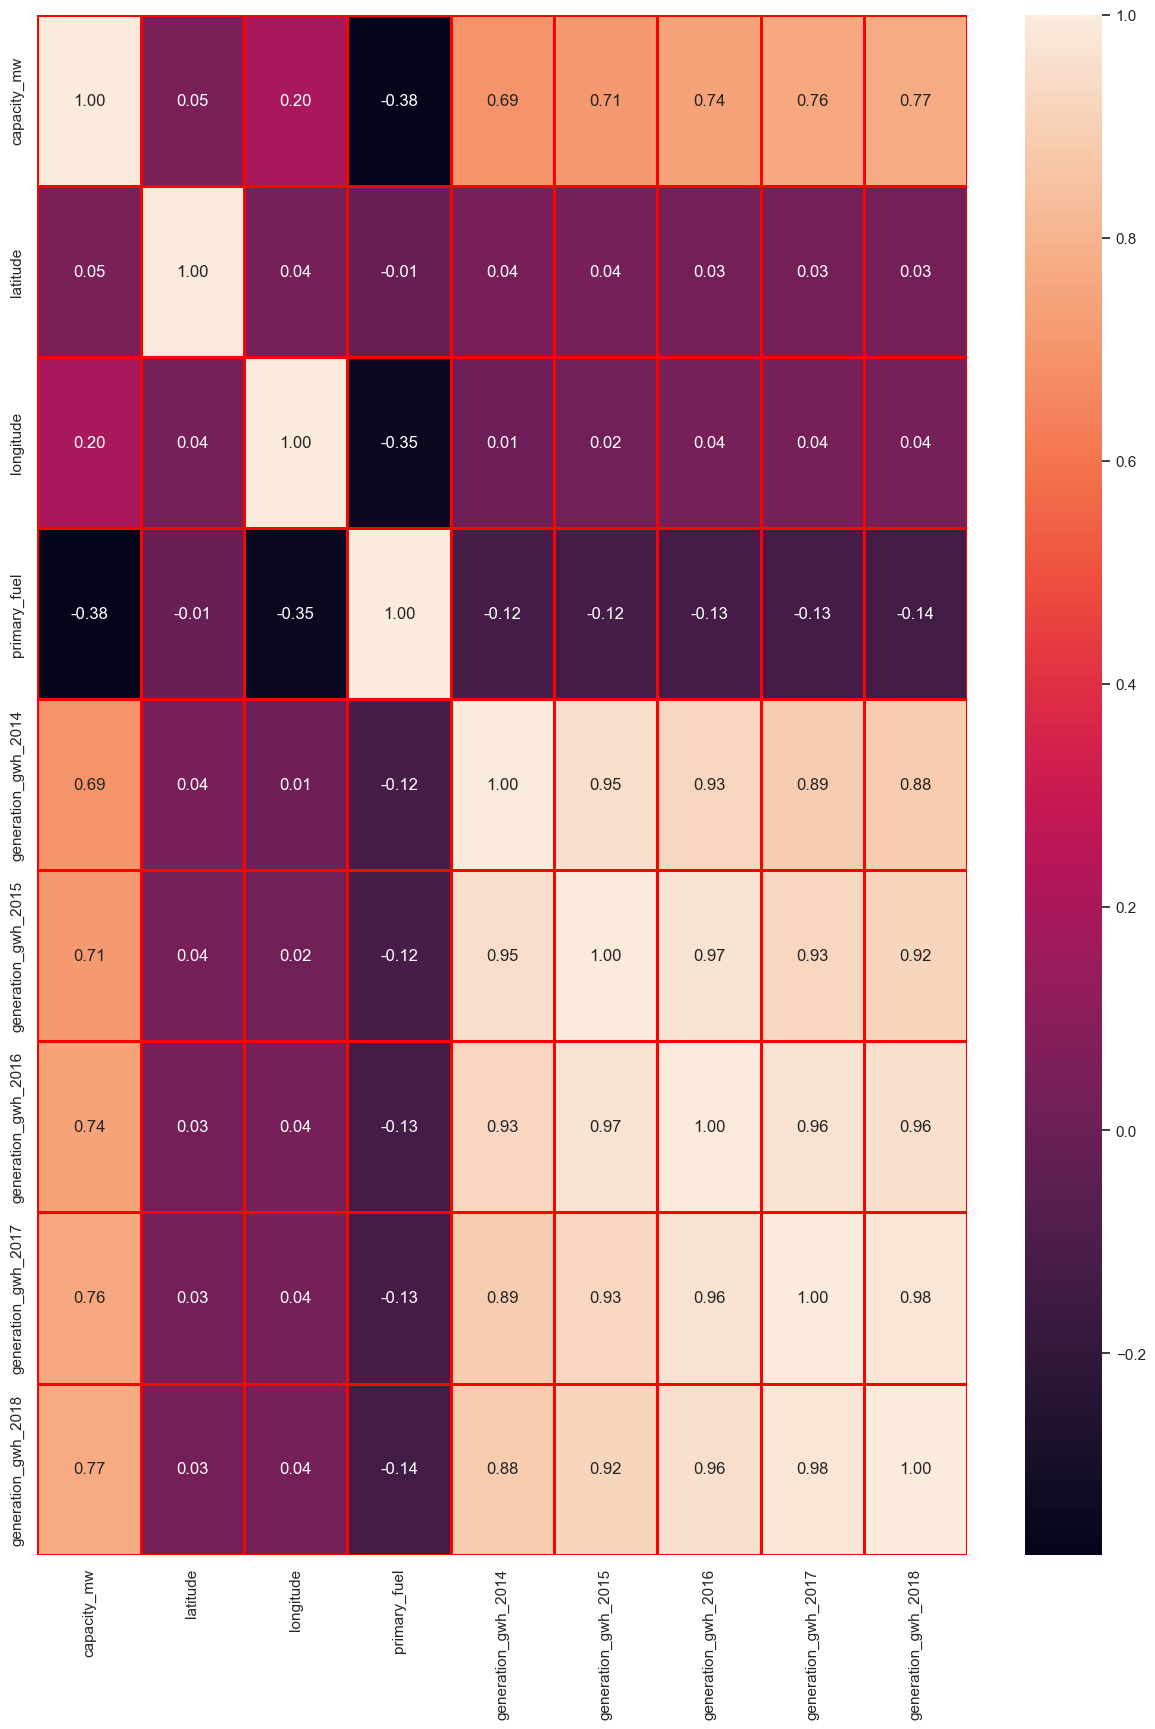

In [50]:
plt.figure(figsize=(15,20))
sns.heatmap( plant.corr(), annot=True, linewidths=1, linecolor='red', fmt='.2f' ) 

In [51]:
## Outliers


<AxesSubplot:>

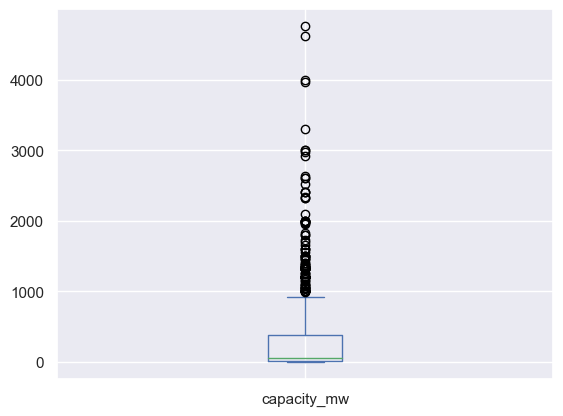

In [52]:
plant['capacity_mw'].plot.box()

<AxesSubplot:>

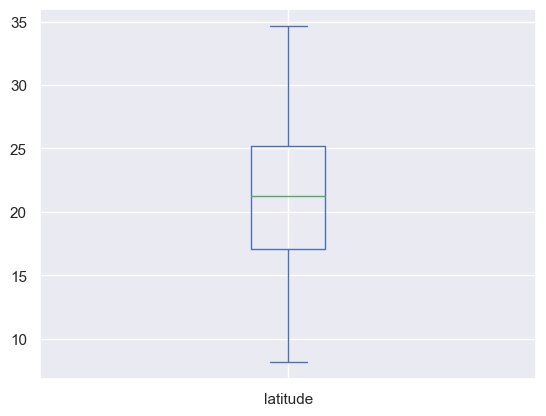

In [53]:
plant['latitude'].plot.box()

<AxesSubplot:>

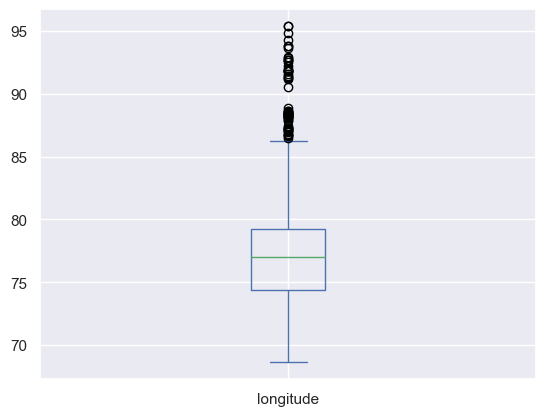

In [54]:
plant['longitude'].plot.box()

<AxesSubplot:>

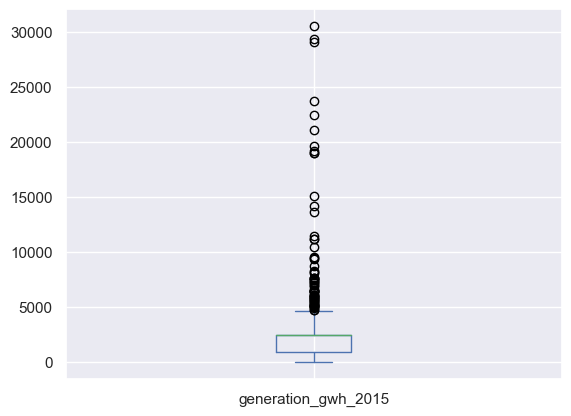

In [55]:
plant['generation_gwh_2015'].plot.box()


<AxesSubplot:>

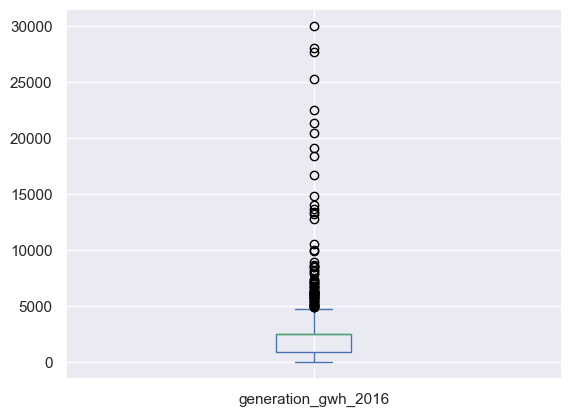

In [56]:
plant['generation_gwh_2016'].plot.box()

<AxesSubplot:>

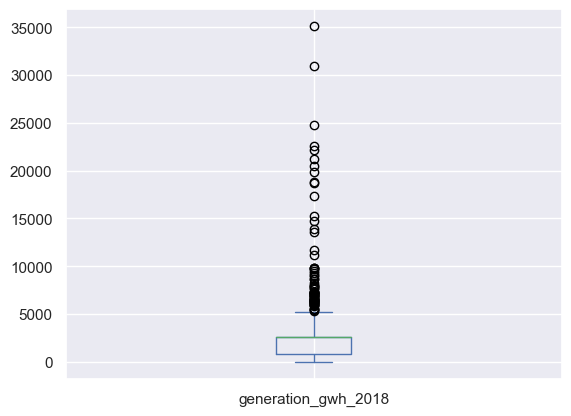

In [57]:
plant['generation_gwh_2018'].plot.box()

In [58]:
# # all the generation have the outtliers
# Remove the outliers

In [59]:
from scipy.stats import zscore
z= np.abs(zscore(plant))

In [60]:
theshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 493, 493, 493, 493, 493, 493, 494, 494, 494,
       494, 494, 494, 499, 519, 546, 577, 638, 648, 648, 648, 648, 648,
       648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695, 695,
       721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726,
       726, 726, 767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808,
       808, 808, 808, 818, 847, 880, 880, 880, 880, 880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 0,
       4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 2, 0, 4, 5, 6, 7, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 8, 4, 5, 6, 7, 8, 0,
       4, 5, 6, 7, 8, 0, 0, 4, 5, 6, 7, 8, 0, 0, 4, 5,

In [61]:
data=plant[(z<3).all(axis=1)]
print(plant.shape)
print(data.shape)

(907, 9)
(868, 9)


In [62]:
Loss_percentage=(907-868)/907*100
print(Loss_percentage)

4.299889746416759


In [63]:
data.shape

(868, 9)

In [64]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [65]:
data.skew()

capacity_mw            2.014499
latitude              -0.107280
longitude              0.934259
primary_fuel           0.420887
generation_gwh_2014    1.510294
generation_gwh_2015    1.381102
generation_gwh_2016    1.405299
generation_gwh_2017    1.273059
generation_gwh_2018    1.311960
dtype: float64

In [66]:
from sklearn.preprocessing import power_transform



In [67]:
## data divide into lbel and feature
x=data.drop(['capacity_mw'], axis=1)
y=data.iloc[:,0]
X= pd.DataFrame(data=x)

In [68]:
## Scaling Data useing standardscaler.
SDc=StandardScaler()
X=SDc.fit_transform(X)

In [69]:
##VIF Calculation.


In [70]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [71]:
plant.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [72]:
plant1= pd.DataFrame( data=X, columns=['latitude', 'longitude', 'primary_fuel', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'])

In [73]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [74]:
calc_vif(plant1)

,variables,VIF FACTOR
0,latitude,1.002958
1,longitude,1.178397
2,primary_fuel,1.167875
3,generation_gwh_2014,5.084749
4,generation_gwh_2015,10.228208
5,generation_gwh_2016,12.342055
6,generation_gwh_2017,14.257707
7,generation_gwh_2018,13.841135


In [75]:
plant1.drop('generation_gwh_2017', axis=1, inplace=True)

In [76]:
calc_vif(plant1)

,variables,VIF FACTOR
0,latitude,1.002920
1,longitude,1.177171
2,primary_fuel,1.167814
3,generation_gwh_2014,5.073655
4,generation_gwh_2015,10.163307
5,generation_gwh_2016,11.218675
6,generation_gwh_2018,6.092152


In [77]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [78]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=i, test_size=0.3)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("Randam State",i, "Model perform very well")
        print("At Random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Training r2_score",r2_score(y_test,pred_test)*100)
        

Randam State 42 Model perform very well
At Random State: 42
Training r2_score 43.49525904607593
Training r2_score 43.499073693562096
Randam State 244 Model perform very well
At Random State: 244
Training r2_score 43.55559567729513
Training r2_score 43.602745340243374
Randam State 278 Model perform very well
At Random State: 278
Training r2_score 43.2405926307192
Training r2_score 43.19678161001802
Randam State 282 Model perform very well
At Random State: 282
Training r2_score 43.9505715238783
Training r2_score 44.018880481401666
Randam State 320 Model perform very well
At Random State: 320
Training r2_score 44.01433766461299
Training r2_score 43.98761000351309


In [79]:
X_train,X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.30, random_state=320)


In [80]:
lr.fit(X_train, Y_train)
pred_test=lr.predict(X_test)
print('linear Accuracy model is:', r2_score(Y_test, pred_test))

linear Accuracy model is: 0.4398761000351309


In [81]:
### Cross Validation of  Model


In [82]:
test_accuracy= r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold{i} Cross Val score is {cv_mean*100} And accuuracy  score is {test_accuracy*100}")
    

At cross fold2 Cross Val score is 39.43656171889373 And accuuracy  score is 43.98761000351309
At cross fold3 Cross Val score is 37.933609256627726 And accuuracy  score is 43.98761000351309
At cross fold4 Cross Val score is 38.143885816485536 And accuuracy  score is 43.98761000351309
At cross fold5 Cross Val score is 38.14239535410833 And accuuracy  score is 43.98761000351309
At cross fold6 Cross Val score is 39.96974297933771 And accuuracy  score is 43.98761000351309
At cross fold7 Cross Val score is 37.17636837602233 And accuuracy  score is 43.98761000351309
At cross fold8 Cross Val score is 38.23073513986256 And accuuracy  score is 43.98761000351309
At cross fold9 Cross Val score is 38.26881233153785 And accuuracy  score is 43.98761000351309


In [83]:
## cross fold6 val  score is 39 and accuracy is  43.9876

In [84]:
print('error')
print('mean Absolute Error', mean_absolute_error(Y_test,pred_test))
print('mean squared error', mean_squared_error(Y_test,pred_test))
print('Root mean square error',np.sqrt(mean_squared_error(Y_test,pred_test)))


error
mean Absolute Error 223.6513904674273
mean squared error 102091.38644796504
Root mean square error 319.51742745578844


In [85]:
## model  is performimg very low. Let's try another model.

In [86]:
## Ridge 

In [87]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(X_train, Y_train)
rd.score(X_train, Y_train)
rd_pred=rd.predict(X_test)
rds=r2_score(Y_test, rd_pred)
print('r2_score:',rds*100)
rdcvscore=cross_val_score(rd,x,y, cv=6, scoring='r2')
rdcv=rdcvscore.mean()
print('cross val score', rdcv*100)


r2_score: 43.98833520196277
cross val score 39.969634528419576


In [88]:
print('Error')

print('mean Absolute Error', mean_absolute_error(Y_test,rd_pred))
print('mean squared error', mean_squared_error(Y_test,rd_pred))
print('Root mean square error',np.sqrt(mean_squared_error(Y_test,rd_pred)))


Error
mean Absolute Error 223.65837619481098
mean squared error 102090.06465978241
Root mean square error 319.51535903580975


In [89]:
## Decision TreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [90]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
dt_pred= dt.predict(X_test)
dt_score=r2_score(Y_test,dt_pred)
print("R2 score", dt_score*100)
dtcvscore=cross_val_score(dt,x,y,cv=6, scoring='r2')
dtcv=dtcvscore.mean()
print('cross val score', dtcv*100)

R2 score 58.2003276083088
cross val score 57.85626928133234


In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
kn=KNeighborsRegressor()
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
kn_pred= kn.predict(X_test)
kn_score=r2_score(Y_test,kn_pred)
print("R2 score", kn_score*100)
kncvscore=cross_val_score(kn,x,y,cv=6, scoring='r2')
kncv=kncvscore.mean()
print('cross val score', kncv*100)

R2 score 73.73972036391321
cross val score 75.12788798810014


In [93]:
##  Hyperperamiter  ', 'log2'],'n_estimato

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [109]:
parameter={'criterion':['mse', 'absolute_error','squared_error','poisson'], 'max_features':['sqrt','log2'] }
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf,param_grid= parameter, n_jobs= -1)
rfclf=rfclf.fit(X_train, Y_train)
print(rfclf.best_params_)

{'criterion': 'squared_error', 'max_features': 'log2'}


In [115]:
rf=RandomForestRegressor(criterion='poisson')

rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
rf_pred= rf.predict(X_test)
rf_score=r2_score(Y_test,rf_pred)
print("R2 score", rf_score*100)
rfcvscore=cross_val_score(rf,x,y,cv=6, scoring='r2')
rfcv=rfcvscore.mean()
print('cross val score', rfcv*100)

R2 score 80.42119177938794
cross val score 76.11699800957723
